In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

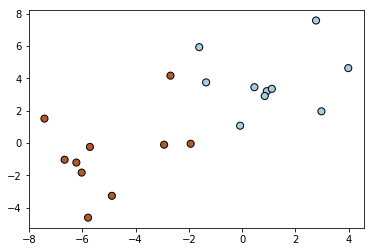

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [3]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

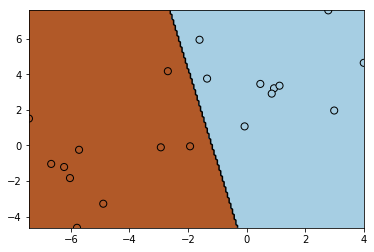

In [5]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

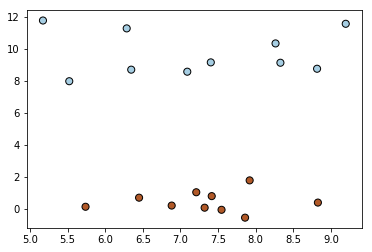

In [6]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

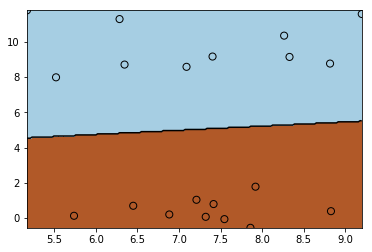

In [7]:
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

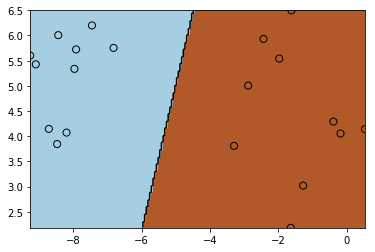

In [8]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

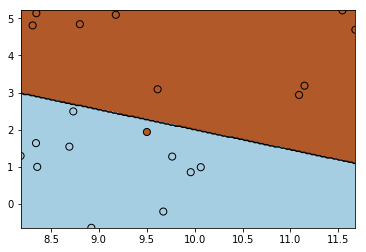

In [9]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [10]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/sqPXpNUQ/width/994/height/536/border/888888/sri/true/sdz/true" width="994px" height="536px" style="border:0px;"> </iframe>')

In [11]:

def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    
    # if SVM, draw margine lines
    colors = ['k']*3
    linestyles = ['-']*3
    levels = [-1, 0, 1]
    # if SVM, plot support vecters
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k')
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, zorder=-10)
    if boundary:
        plt.contour(XX, YY, Z, 
                    colors=colors,
                    linestyles=linestyles,
                    levels=levels) # draw lines (level=0:boundary, level=+-1:margine lines)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

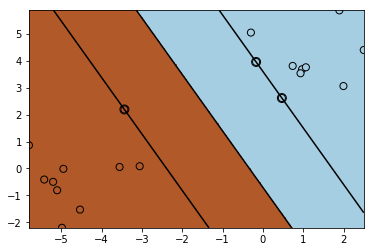

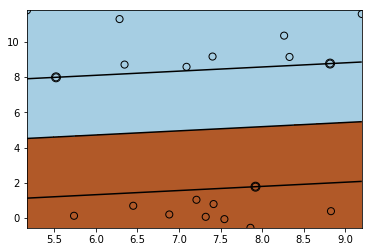

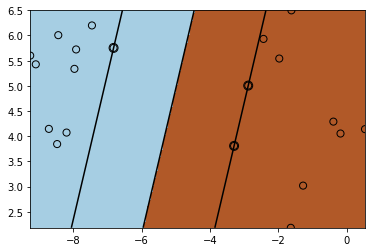

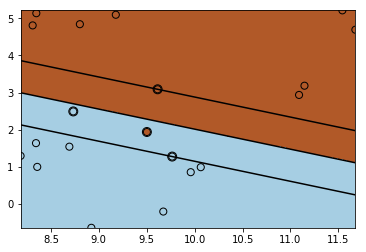

In [12]:
clf = SVC(kernel='linear')

for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )
    clf.fit(X,y)

    plotSVMBoundary(X, clf)

    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

    plt.show()

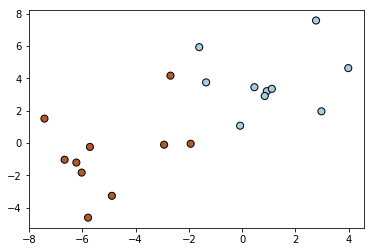

In [13]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

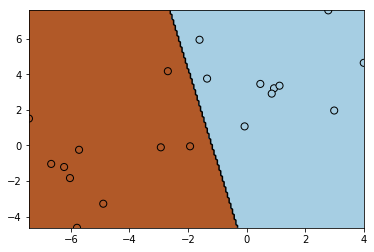

In [14]:
clf.probability = True
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

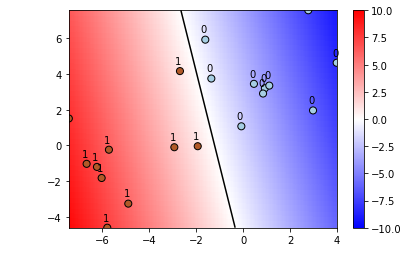

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="value", clim=(-10, 10))

for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4)) # plot label

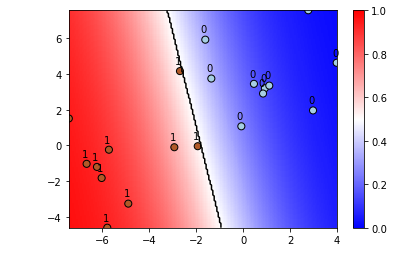

In [16]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0,1))

for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4)) # plot label

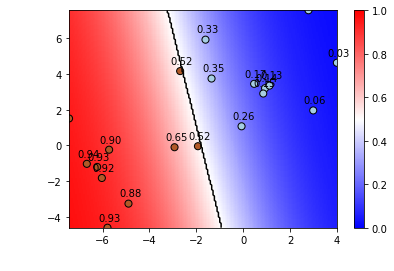

In [17]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0,1))

X_test_value = np.exp(clf.predict_log_proba(X))[:, 1]

for l, dx, dy in zip(X_test_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(l), xy=(dx-0.4, dy+0.4)) # plot probabilities

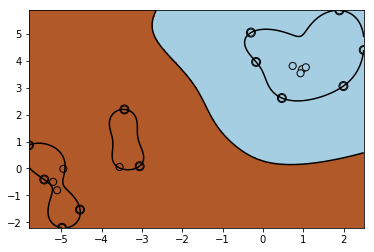

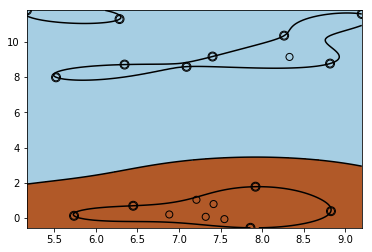

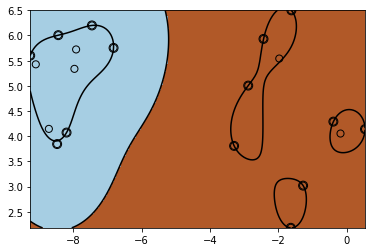

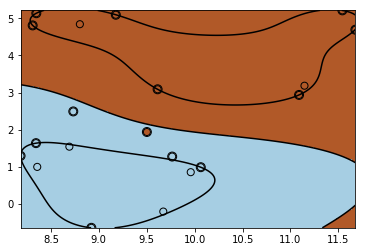

In [18]:
for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )

    clf.kernel = 'rbf' # default

    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    
    plt.show()

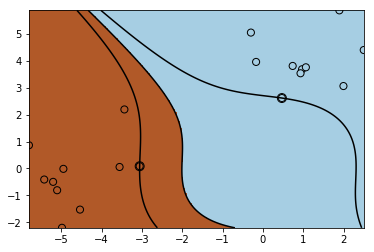

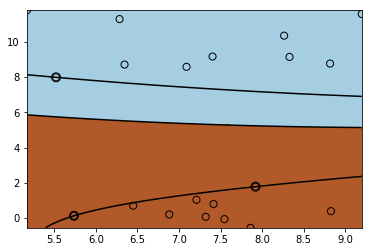

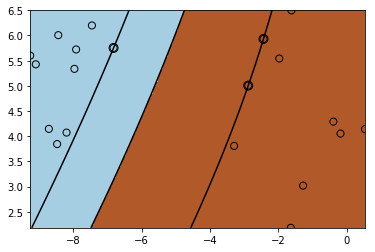

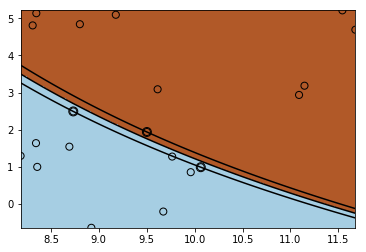

In [19]:
for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )
    clf.kernel = 'poly'
    
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    
    plt.show()

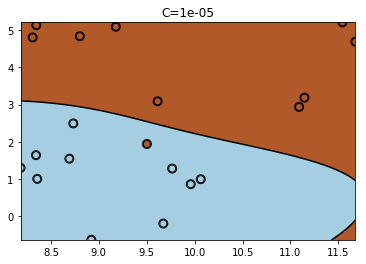

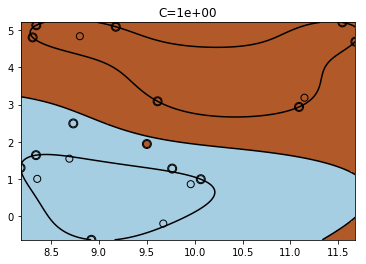

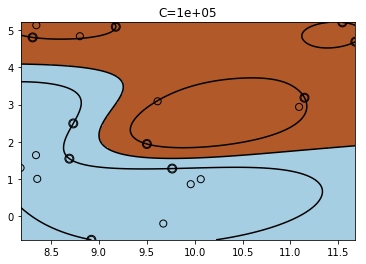

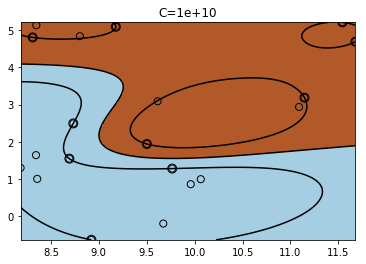

In [20]:
for C in [1e-5, 1, 1e5, 1e10]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=4   # 乱数種（再現用）
                     )
    clf.kernel = 'rbf'
    
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [23]:
clf = SVC()

In [24]:
clf.kernel = 'linear'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [25]:
clf.kernel = 'rbf'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.58771929824561409

In [26]:
# clf.kernel = 'poly'

# clf.fit(X_train, y_train) # 終わらない！
# clf.score(X_test, y_test)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [28]:
clf.kernel = 'linear'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.96491228070175439

In [29]:
clf.kernel = 'rbf'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.95614035087719296

In [30]:
clf.kernel = 'poly'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.61403508771929827